In [1]:
from qiskit import *

In [2]:
# create 2-qubits quanutm register 
qr = QuantumRegister(2)

In [3]:
# create 2-bit classical register for measurement
cr = ClassicalRegister(2)

In [4]:
# build and draw circuit
circuit = QuantumCircuit(qr, cr)

In [6]:
%matplotlib inline
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [7]:
# create the Bell state of two qubits
circuit.h(qr[0])

In [8]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [9]:
circuit.cx(qr[0], qr[1])

In [10]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [11]:
circuit.measure(qr, cr)

In [12]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [15]:
# get results with a simulator
simulator = Aer.get_backend('qasm_simulator')

In [17]:
result = execute(circuit, backend=simulator).result()

In [18]:
from qiskit.tools.visualization import plot_histogram

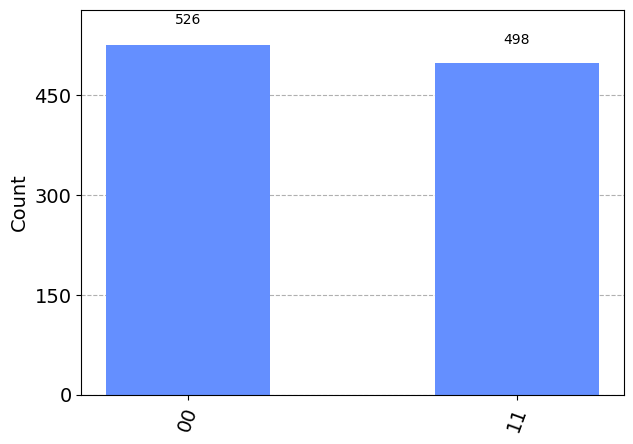

In [19]:
plot_histogram(result.get_counts(circuit))

In [20]:
# get results with a quantum computer
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [21]:
provider = IBMQ.get_provider('ibm-q')

In [26]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [27]:
qcomp = provider.get_backend('ibm_oslo')

In [28]:
job = execute(circuit, backend=qcomp)

In [29]:
from qiskit.tools.monitor import job_monitor

In [30]:
job_monitor(job)

Job Status: job has successfully run


In [31]:
result = job.result()

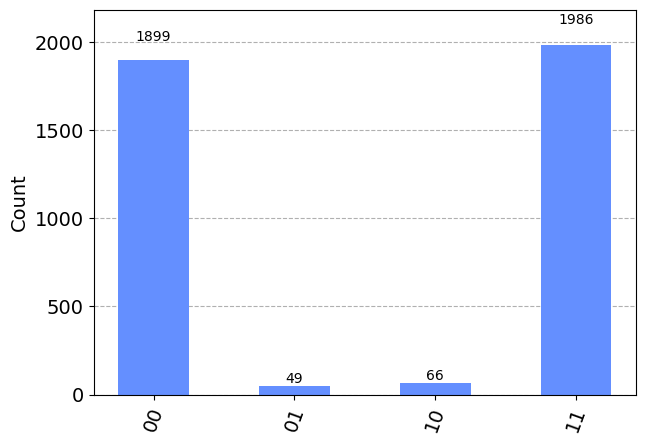

In [32]:
plot_histogram(result.get_counts(circuit))